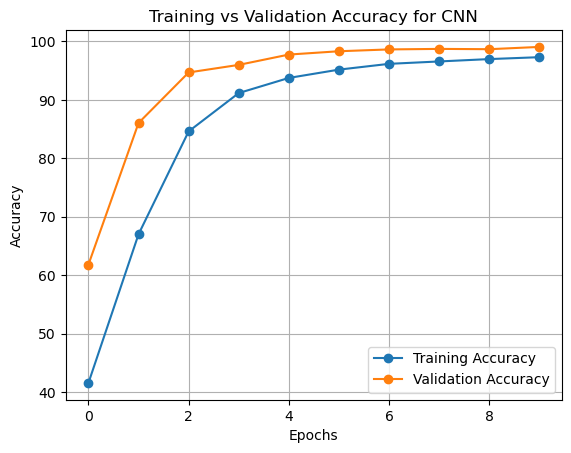

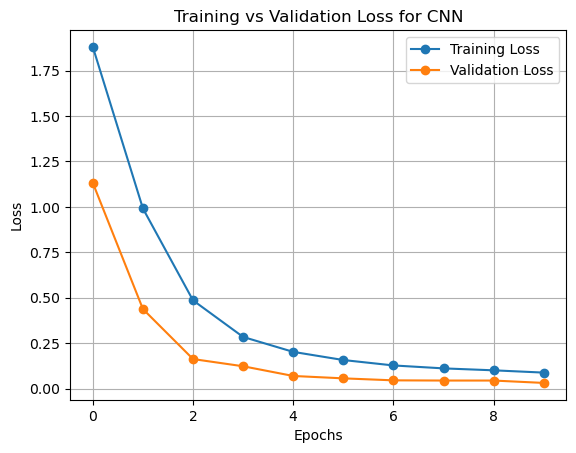

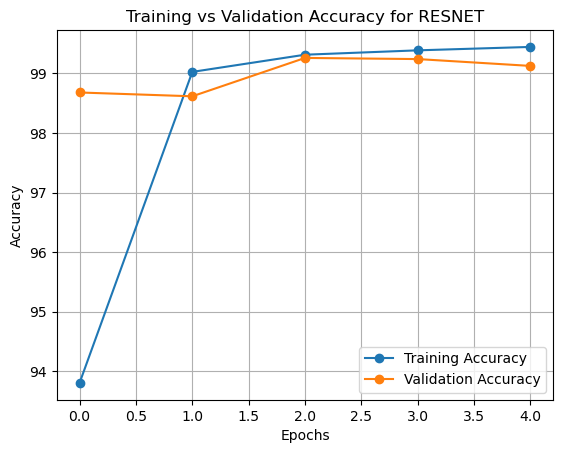

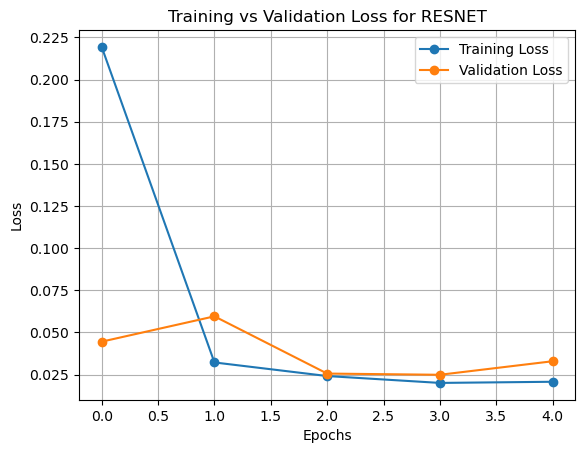

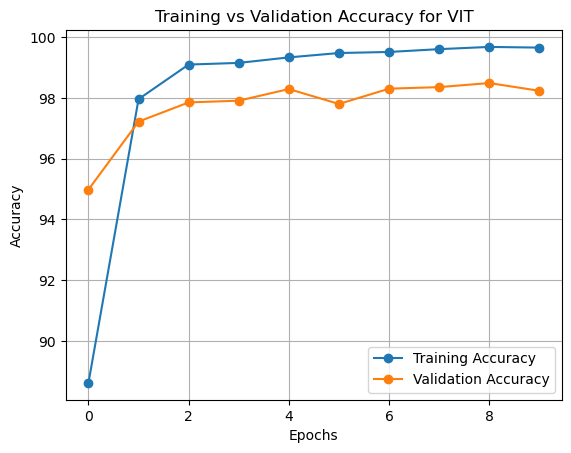

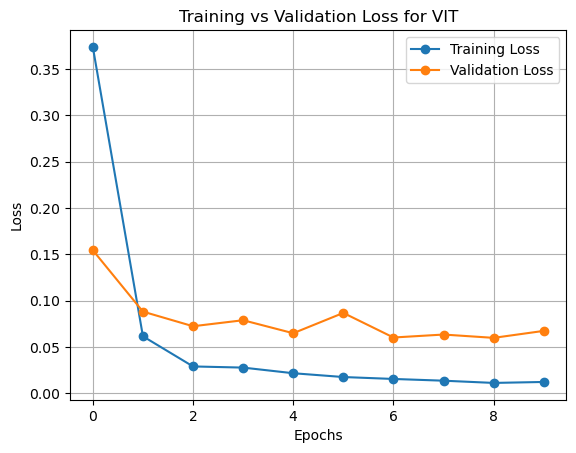

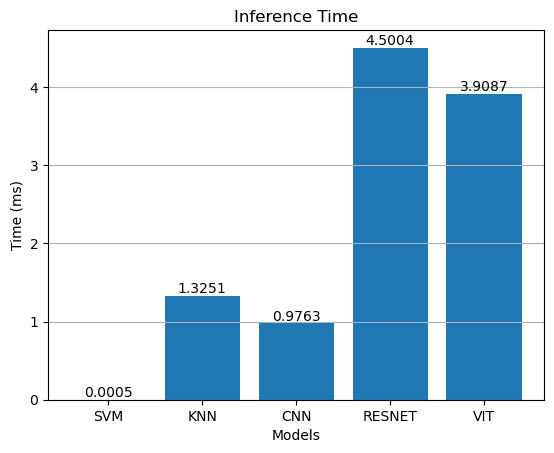

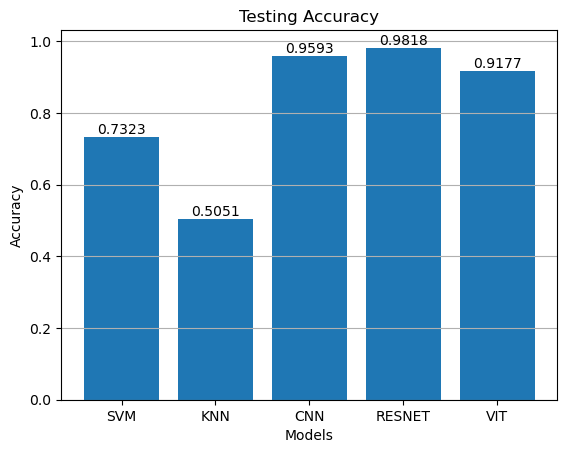

In [8]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the models
base_dir = "runs"
models = ["base_svm", "base_knn", "base_cnn", "base_resnet", "base_vit"]

# Initialize storage for metrics
metrics = {}

# Iterate through models and load data
for model in models:
    log_path = os.path.join(base_dir, model, "log.pkl")
    if os.path.exists(log_path):
        with open(log_path, "rb") as f:
            metrics[model] = pickle.load(f)

# Ensure all models have been processed
if not metrics:
    print("No log.pkl files found in the specified directories.")
    exit()

# Extract metrics for bar graphs
inference_times = []
testing_accuracies = []
model_names = []

for model, data in metrics.items():
    model_names.append(model.replace("base_", "").upper())
    inference_times.append(data.get("inference_time", 0))
    testing_accuracies.append(data.get("test_accuracy", 0))

# Separate plots for training vs validation for CNN, ResNet50, and ViT
plot_models = ["base_cnn", "base_resnet", "base_vit"]
for model in plot_models:
    if model in metrics:
        data = metrics[model]
        
        # Training vs Validation Accuracy
        plt.figure()
        plt.plot(data.get("train_accuracy", []), label="Training Accuracy", marker="o")
        plt.plot(data.get("val_accuracy", []), label="Validation Accuracy", marker="o")
        plt.title(f"Training vs Validation Accuracy for {model.replace('base_', '').upper()}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid()
        plt.show()

        # Training vs Validation Loss
        plt.figure()
        plt.plot(data.get("train_loss", []), label="Training Loss", marker="o")
        plt.plot(data.get("val_loss", []), label="Validation Loss", marker="o")
        plt.title(f"Training vs Validation Loss for {model.replace('base_', '').upper()}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid()
        plt.show()

# Bar graph for inference time
inference_times = [t * 1000 for t in inference_times]
plt.figure()
bars = plt.bar(model_names, inference_times)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')
plt.title("Inference Time")
plt.xlabel("Models")
plt.ylabel("Time (ms)")
plt.grid(axis="y")
plt.show()

# Bar graph for testing accuracy
plt.figure()
bars = plt.bar(model_names, testing_accuracies)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')
plt.title("Testing Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.show()


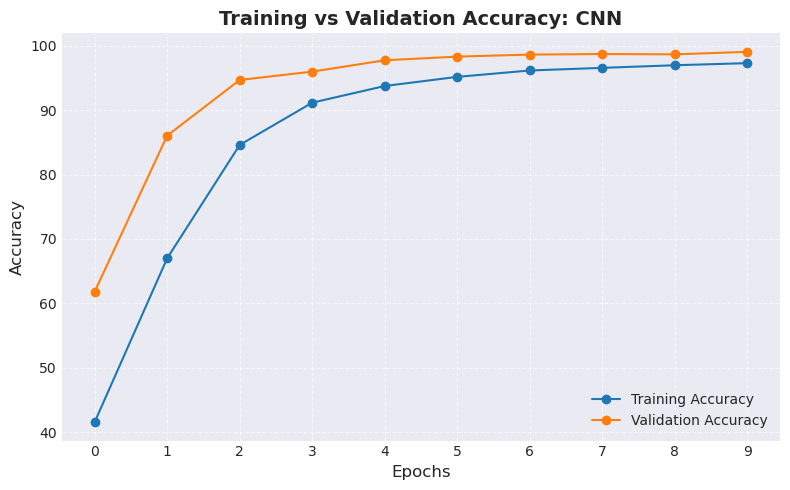

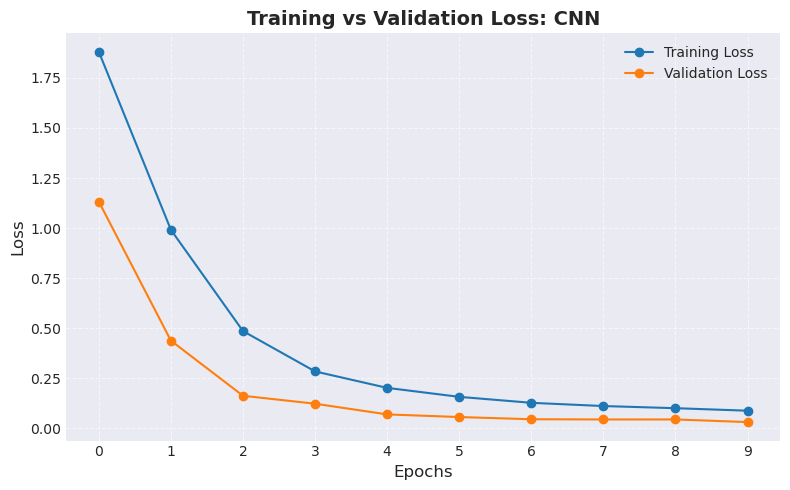

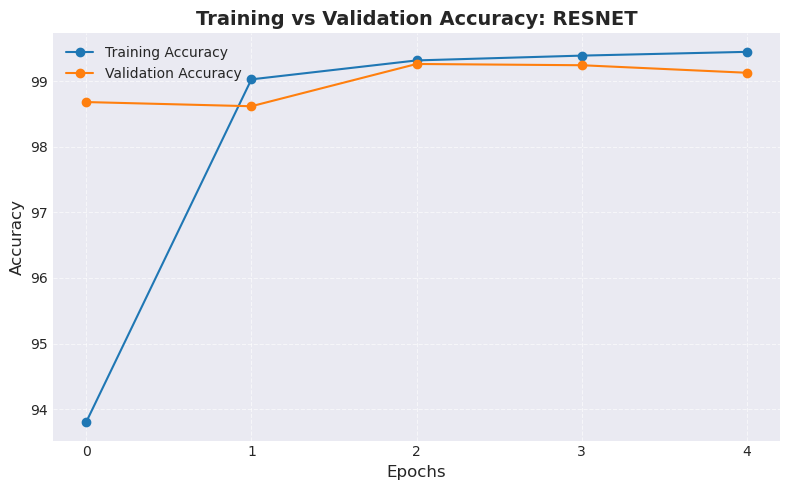

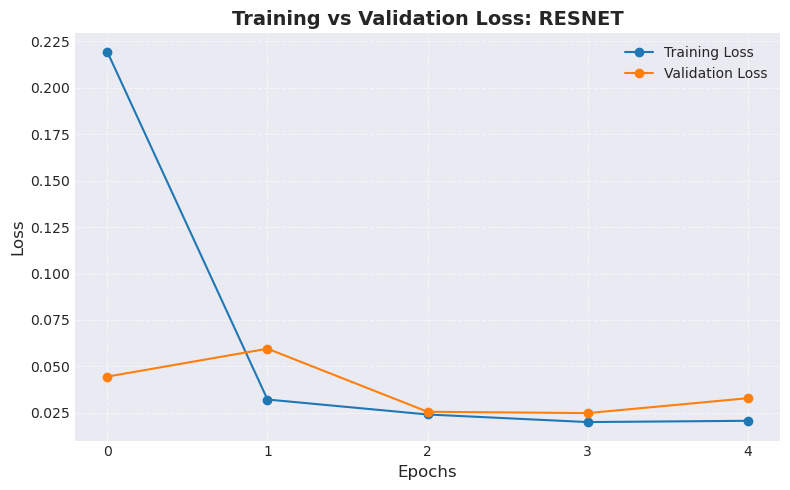

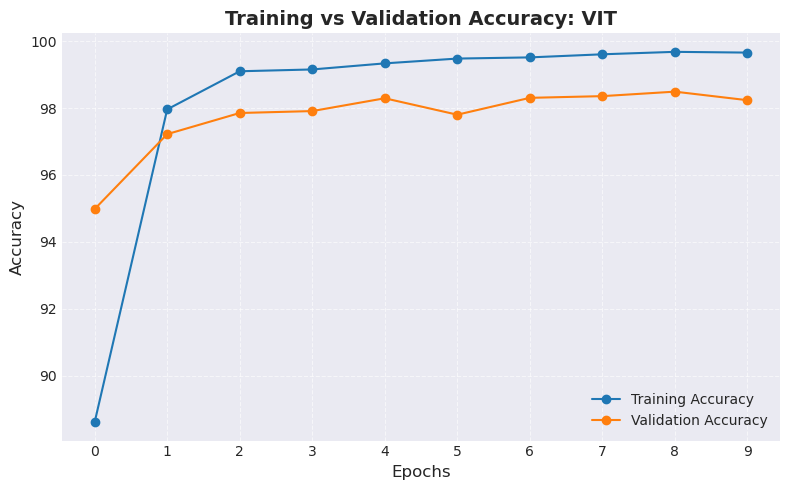

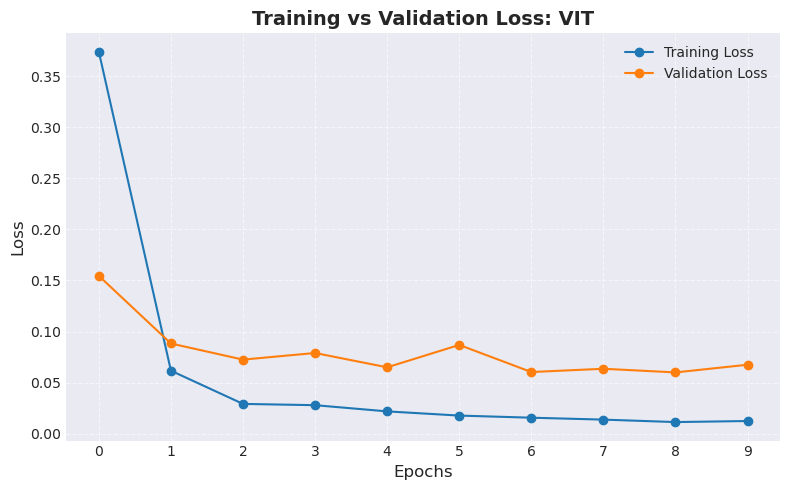

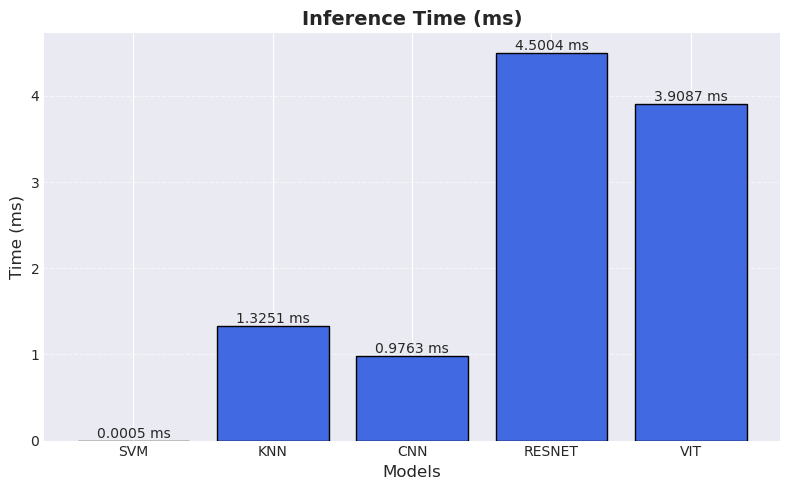

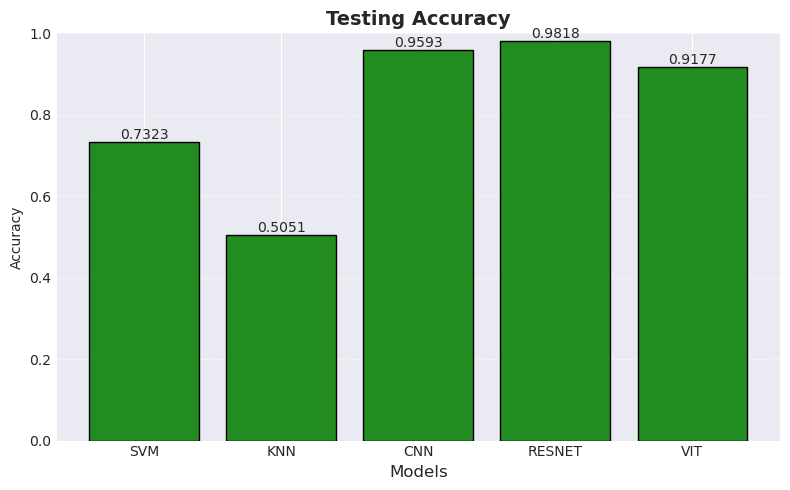

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the models
base_dir = "runs"
models = ["base_svm", "base_knn", "base_cnn", "base_resnet", "base_vit"]

# Define the folder to save images
save_dir = "./images"
os.makedirs(save_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Initialize storage for metrics
metrics = {}

# Iterate through models and load data
for model in models:
    log_path = os.path.join(base_dir, model, "log.pkl")
    if os.path.exists(log_path):
        with open(log_path, "rb") as f:
            metrics[model] = pickle.load(f)

# Ensure all models have been processed
if not metrics:
    print("No log.pkl files found in the specified directories.")
    exit()

# Extract metrics for bar graphs
inference_times = []
testing_accuracies = []
model_names = []

for model, data in metrics.items():
    model_names.append(model.replace("base_", "").upper())
    inference_times.append(data.get("inference_time", 0))
    testing_accuracies.append(data.get("test_accuracy", 0))

# Apply a consistent Matplotlib style
plt.style.use("seaborn-v0_8-darkgrid")  # Use a modern, clean style

# Separate plots for training vs validation for CNN, ResNet50, and ViT
plot_models = ["base_cnn", "base_resnet", "base_vit"]
for model in plot_models:
    if model in metrics:
        data = metrics[model]
        
        # Training vs Validation Accuracy
        plt.figure(figsize=(8, 5))
        epochs = range(len(data.get("train_accuracy", [])))  # Epoch range
        plt.plot(epochs, data.get("train_accuracy", []), label="Training Accuracy", marker="o")
        plt.plot(epochs, data.get("val_accuracy", []), label="Validation Accuracy", marker="o")
        plt.title(f"Training vs Validation Accuracy: {model.replace('base_', '').upper()}", fontsize=14, fontweight='bold')
        plt.xlabel("Epochs", fontsize=12)
        plt.ylabel("Accuracy", fontsize=12)
        plt.xticks(ticks=epochs)  # Show integer ticks only
        plt.legend(fontsize=10)
        plt.grid(visible=True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"{model.replace('base_', '').lower()}_accuracy.png"))
        plt.close()

        # Training vs Validation Loss
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, data.get("train_loss", []), label="Training Loss", marker="o")
        plt.plot(epochs, data.get("val_loss", []), label="Validation Loss", marker="o")
        plt.title(f"Training vs Validation Loss: {model.replace('base_', '').upper()}", fontsize=14, fontweight='bold')
        plt.xlabel("Epochs", fontsize=12)
        plt.ylabel("Loss", fontsize=12)
        plt.xticks(ticks=epochs)  # Show integer ticks only
        plt.legend(fontsize=10)
        plt.grid(visible=True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"{model.replace('base_', '').lower()}_loss.png"))
        plt.close()

# Bar graph for inference time
inference_times = [t * 1000 for t in inference_times]  # Convert to ms
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, inference_times, color='royalblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f} ms', ha='center', va='bottom', fontsize=10)
plt.title("Inference Time (ms)", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Time (ms)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "inference_time.png"))
plt.close()

# Bar graph for testing accuracy
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, testing_accuracies, color='forestgreen', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)
plt.title("Testing Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)  # Ensure accuracy scale is 0-1
plt.grid(axis="y", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "testing_accuracy.png"))
plt.close()
